Supervised binary classification task for predicting the brand of sunflower oil using the optical analysis.

Target brands: "Red price" and "Golden_seed" 

Datasets are presented in the following files: "oil_golden_seed copy.csv" and "oil_red_price copy.csv". These are optical spectrum data from the spectrographic measurements.

Feature tensor represents a set of relative absorbtion ratio ("%T") of light passing through the sample for each wavelength value. So we have 2-dimension tensor [sample_number, absorbtion ratio].

In [26]:
import pandas as pd
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
pd.set_option('display.max_columns', 100)

/tmp/ipykernel_26180/1256574904.py:2: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


Importing and preprocessing data.

In [2]:
df_golden_seed = pd.read_csv("oil_golden_seed copy.csv")
df_red_price = pd.read_csv("oil_red_price copy.csv")


In [3]:
df_golden_seed= df_golden_seed.transpose().dropna().transpose()
df_red_price= df_red_price.transpose().dropna().transpose()


In [4]:
def transform_df(df, targ):
    df = df.filter(regex = r"%T")
    df1_1 = df.transpose()
    df1_1['target'] = targ
    return df1_1

In [5]:
df_golden_seed_1 = transform_df(df_golden_seed, "golden_seed")
df_red_price_1 = transform_df(df_red_price, "red_price")


Mean "Red Price" sunflower oil spectrum visualisation:

/tmp/ipykernel_26180/1036672877.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_red_price_1.mean().plot()


<AxesSubplot:>

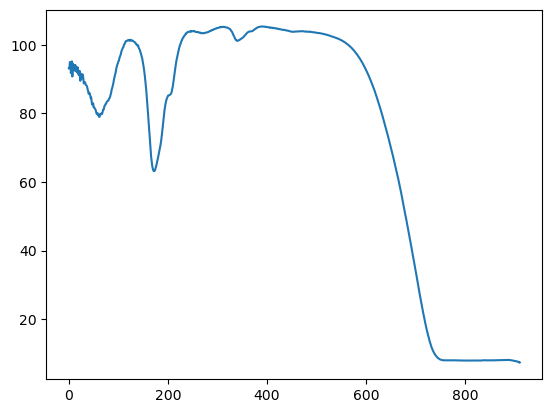

In [6]:
df_red_price_1.mean().plot()

Concatenating both spectrums into the single dataset:

In [27]:
df = pd.concat([df_red_price_1, df_golden_seed_1])
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,target
%T,99.337090,100.249802,98.177658,97.640030,102.129456,100.725746,97.896927,103.310608,98.907608,99.889305,100.818047,99.599586,101.023758,98.572319,101.100815,101.036278,98.960754,101.472092,98.959923,100.572456,101.594231,100.222443,98.781944,102.984085,100.827980,99.582977,101.087250,99.527252,99.184128,99.938736,102.308342,101.987144,100.781082,101.035454,102.068245,101.017487,100.762711,101.211525,101.291206,100.892219,101.262543,100.699890,100.227989,100.621185,101.849655,100.765945,101.958107,102.638878,101.775429,101.234032,...,96.829811,96.924141,96.973640,97.022408,97.007874,97.015884,97.047791,97.025993,97.067467,97.064178,97.057228,97.138557,97.132919,97.156570,97.179428,97.207130,97.245537,97.292358,97.345360,97.441963,97.514069,97.599442,97.663567,97.674149,97.658417,97.596268,97.485443,97.375107,97.175476,96.959152,96.711700,96.355103,95.967651,95.570099,95.191406,94.836639,94.475403,94.090805,93.743607,93.474838,93.132202,92.727028,92.505508,91.481812,91.429367,90.301964,89.043396,89.710884,87.991386,red_price
%T.1,99.337090,100.249802,98.177658,97.640030,102.129456,100.725746,97.896927,103.310608,98.907608,99.889305,100.818047,99.599586,101.023758,98.572319,101.100815,101.036278,98.960754,101.472092,98.959923,100.572456,101.594231,100.222443,98.781944,102.984085,100.827980,99.582977,101.087250,99.527252,99.184128,99.938736,102.308342,101.987144,100.781082,101.035454,102.068245,101.017487,100.762711,101.211525,101.291206,100.892219,101.262543,100.699890,100.227989,100.621185,101.849655,100.765945,101.958107,102.638878,101.775429,101.234032,...,96.829811,96.924141,96.973640,97.022408,97.007874,97.015884,97.047791,97.025993,97.067467,97.064178,97.057228,97.138557,97.132919,97.156570,97.179428,97.207130,97.245537,97.292358,97.345360,97.441963,97.514069,97.599442,97.663567,97.674149,97.658417,97.596268,97.485443,97.375107,97.175476,96.959152,96.711700,96.355103,95.967651,95.570099,95.191406,94.836639,94.475403,94.090805,93.743607,93.474838,93.132202,92.727028,92.505508,91.481812,91.429367,90.301964,89.043396,89.710884,87.991386,red_price
%T.2,99.337090,100.249802,98.177658,97.640030,102.129456,100.725746,97.896927,103.310608,98.907608,99.889305,100.818047,99.599586,101.023758,98.572319,101.100815,101.036278,98.960754,101.472092,98.959923,100.572456,101.594231,100.222443,98.781944,102.984085,100.827980,99.582977,101.087250,99.527252,99.184128,99.938736,102.308342,101.987144,100.781082,101.035454,102.068245,101.017487,100.762711,101.211525,101.291206,100.892219,101.262543,100.699890,100.227989,100.621185,101.849655,100.765945,101.958107,102.638878,101.775429,101.234032,...,96.829811,96.924141,96.973640,97.022408,97.007874,97.015884,97.047791,97.025993,97.067467,97.064178,97.057228,97.138557,97.132919,97.156570,97.179428,97.207130,97.245537,97.292358,97.345360,97.441963,97.514069,97.599442,97.663567,97.674149,97.658417,97.596268,97.485443,97.375107,97.175476,96.959152,96.711700,96.355103,95.967651,95.570099,95.191406,94.836639,94.475403,94.090805,93.743607,93.474838,93.132202,92.727028,92.505508,91.481812,91.429367,90.301964,89.043396,89.710884,87.991386,red_price
%T.3,99.337090,100.249802,98.177658,97.640030,102.129456,100.725746,97.896927,103.310608,98.907608,99.889305,100.818047,99.599586,101.023758,98.572319,101.100815,101.036278,98.960754,101.472092,98.959923,100.572456,101.594231,100.222443,98.781944,102.984085,100.827980,99.582977,101.087250,99.527252,99.184128,99.938736,102.308342,101.987144,100.781082,101.035454,102.068245,101.017487,100.762711,101.211525,101.291206,100.892219,101.262543,100.699890,100.227989,100.621185,101.849655,100.765945,101.958107,102.638878,101.

In [8]:
def make_mean_spectr(spectr1_df):
    mean_df_1 = pd.DataFrame()
    for Description in set(spectr1_df.target):
        df1 = spectr1_df[spectr1_df.target == Description].mean(axis = 0)
        df1 = pd.DataFrame(df1, columns= [Description]).transpose()
        mean_df_1 = mean_df_1.append(df1)
    return mean_df_1


In [9]:
df_spectr = make_mean_spectr(df).transpose()
df_spectr

/tmp/ipykernel_26180/2012781716.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df1 = spectr1_df[spectr1_df.target == Description].mean(axis = 0)
/tmp/ipykernel_26180/2012781716.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mean_df_1 = mean_df_1.append(df1)
/tmp/ipykernel_26180/2012781716.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df1 = spectr1_df[spectr1_df.target == Description].mean(axis = 0)
/tmp/ipykernel_26180/2012781716.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

,red_price,golden_seed
0,93.105671,86.894904
1,93.150826,86.527456
2,94.943396,87.477530
3,94.876642,85.684649
4,91.742556,88.894642
...,...,...
906,7.595882,0.614127
907,7.500862,0.603300
908,7.410544,0.589342
909,7.485482,0.603885


Comparing mean spectrums:

Text(0, 0.5, 'Intensity')

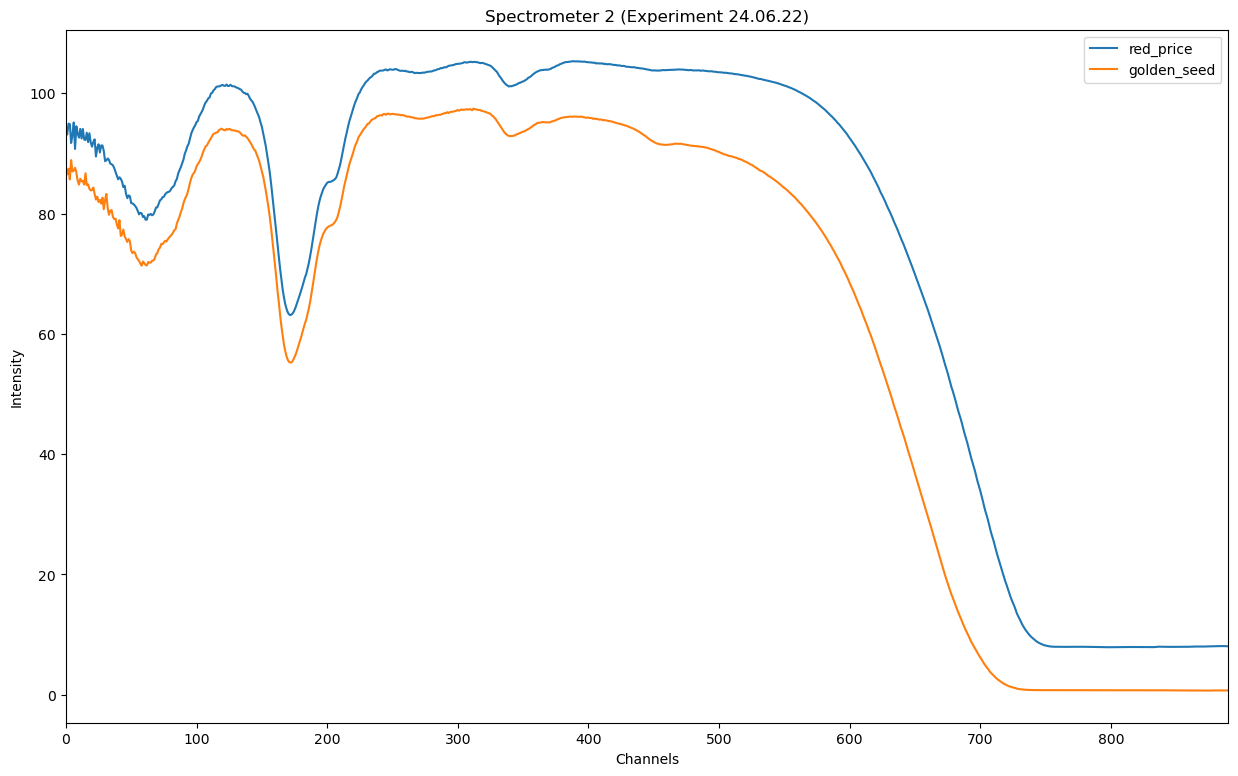

In [10]:
df_spectr.plot(figsize=(15, 9))

#plt.legend(loc="upper left")
plt.xlim(0,890)
#plt.ylim(0.5,2.5)
plt.title("Spectrometer 2 (Experiment 24.06.22)")
plt.xlabel("Channels")
plt.ylabel("Intensity")

Machine learning

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

from catboost import CatBoostClassifier

Adding target columns

In [30]:
dictionary ={'golden_seed' : 0, 'red_price' : 1}

df['target_bin'] = df.target.map(dictionary)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,target,target_bin
%T,99.337090,100.249802,98.177658,97.640030,102.129456,100.725746,97.896927,103.310608,98.907608,99.889305,100.818047,99.599586,101.023758,98.572319,101.100815,101.036278,98.960754,101.472092,98.959923,100.572456,101.594231,100.222443,98.781944,102.984085,100.827980,99.582977,101.087250,99.527252,99.184128,99.938736,102.308342,101.987144,100.781082,101.035454,102.068245,101.017487,100.762711,101.211525,101.291206,100.892219,101.262543,100.699890,100.227989,100.621185,101.849655,100.765945,101.958107,102.638878,101.775429,101.234032,...,96.924141,96.973640,97.022408,97.007874,97.015884,97.047791,97.025993,97.067467,97.064178,97.057228,97.138557,97.132919,97.156570,97.179428,97.207130,97.245537,97.292358,97.345360,97.441963,97.514069,97.599442,97.663567,97.674149,97.658417,97.596268,97.485443,97.375107,97.175476,96.959152,96.711700,96.355103,95.967651,95.570099,95.191406,94.836639,94.475403,94.090805,93.743607,93.474838,93.132202,92.727028,92.505508,91.481812,91.429367,90.301964,89.043396,89.710884,87.991386,red_price,1
%T.1,99.337090,100.249802,98.177658,97.640030,102.129456,100.725746,97.896927,103.310608,98.907608,99.889305,100.818047,99.599586,101.023758,98.572319,101.100815,101.036278,98.960754,101.472092,98.959923,100.572456,101.594231,100.222443,98.781944,102.984085,100.827980,99.582977,101.087250,99.527252,99.184128,99.938736,102.308342,101.987144,100.781082,101.035454,102.068245,101.017487,100.762711,101.211525,101.291206,100.892219,101.262543,100.699890,100.227989,100.621185,101.849655,100.765945,101.958107,102.638878,101.775429,101.234032,...,96.924141,96.973640,97.022408,97.007874,97.015884,97.047791,97.025993,97.067467,97.064178,97.057228,97.138557,97.132919,97.156570,97.179428,97.207130,97.245537,97.292358,97.345360,97.441963,97.514069,97.599442,97.663567,97.674149,97.658417,97.596268,97.485443,97.375107,97.175476,96.959152,96.711700,96.355103,95.967651,95.570099,95.191406,94.836639,94.475403,94.090805,93.743607,93.474838,93.132202,92.727028,92.505508,91.481812,91.429367,90.301964,89.043396,89.710884,87.991386,red_price,1
%T.2,99.337090,100.249802,98.177658,97.640030,102.129456,100.725746,97.896927,103.310608,98.907608,99.889305,100.818047,99.599586,101.023758,98.572319,101.100815,101.036278,98.960754,101.472092,98.959923,100.572456,101.594231,100.222443,98.781944,102.984085,100.827980,99.582977,101.087250,99.527252,99.184128,99.938736,102.308342,101.987144,100.781082,101.035454,102.068245,101.017487,100.762711,101.211525,101.291206,100.892219,101.262543,100.699890,100.227989,100.621185,101.849655,100.765945,101.958107,102.638878,101.775429,101.234032,...,96.924141,96.973640,97.022408,97.007874,97.015884,97.047791,97.025993,97.067467,97.064178,97.057228,97.138557,97.132919,97.156570,97.179428,97.207130,97.245537,97.292358,97.345360,97.441963,97.514069,97.599442,97.663567,97.674149,97.658417,97.596268,97.485443,97.375107,97.175476,96.959152,96.711700,96.355103,95.967651,95.570099,95.191406,94.836639,94.475403,94.090805,93.743607,93.474838,93.132202,92.727028,92.505508,91.481812,91.429367,90.301964,89.043396,89.710884,87.991386,red_price,1
%T.3,99.337090,100.249802,98.177658,97.640030,102.129456,100.725746,97.896927,103.310608,98.907608,99.889305,100.818047,99.599586,101.023758,98.572319,101.100815,101.036278,98.960754,101.472092,98.959923,100.572456,101.594231,100.222443,98.781944,102.984085,100.827980,99.582977,101.087250,99.527252,99.184128,99.938736,102.308342,101.987144,100.781082,101.035454,102.068245,101.017487,100.762711,101.211525,101.291206,100.892219,101.262543,100.699890,100.227989,100.621185,101.849655,100.765945,101.958107,102.638878,101.775429,101.234032

In [32]:
X = df.iloc[:,:-2]
y = df.target_bin
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, stratify=y)

Using CatBoost Classifier

In [15]:
cb = CatBoostClassifier(
   #iterations = 1000,
   #custom_loss=['AUC'],
   loss_function = 'Logloss',
    #eval_metric = 'AUC',
    #random_seed = 20190128,
    #scale_pos_weight = 0.8,
    #class_weights= (100, 1),
    #learning_rate = 0.2,
    #auto_class_weights = 'Balanced',
    #depth = 10, 
    #l2_leaf_reg = 25,
    verbose=100,
    #ignored_features = ignored
)

In [16]:
cb.fit(X_train, y_train, 
       plot = True, 
       eval_set=(X_test, y_test), 
       use_best_model = True
      )

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.020516
0:	learn: 0.6530025	test: 0.6551784	best: 0.6551784 (0)	total: 423ms	remaining: 7m 2s
100:	learn: 0.0213494	test: 0.0216932	best: 0.0216932 (100)	total: 24.4s	remaining: 3m 36s
200:	learn: 0.0069522	test: 0.0068668	best: 0.0068668 (200)	total: 46.6s	remaining: 3m 5s
300:	learn: 0.0038627	test: 0.0038080	best: 0.0038080 (300)	total: 1m 7s	remaining: 2m 37s
400:	learn: 0.0028816	test: 0.0028726	best: 0.0028726 (400)	total: 1m 31s	remaining: 2m 16s
500:	learn: 0.0024833	test: 0.0025330	best: 0.0025330 (500)	total: 1m 57s	remaining: 1m 56s
600:	learn: 0.0022488	test: 0.0023462	best: 0.0023462 (600)	total: 2m 26s	remaining: 1m 36s
700:	learn: 0.0020601	test: 0.0021905	best: 0.0021905 (700)	total: 2m 53s	remaining: 1m 13s
800:	learn: 0.0018865	test: 0.0020327	best: 0.0020327 (800)	total: 3m 20s	remaining: 49.9s
900:	learn: 0.0017087	test: 0.0018587	best: 0.0018587 (900)	total: 3m 44s	remaining: 24.7s
999:	learn: 0.0015589	test: 0.0017147	best: 0.0017147 (999)	to

In [17]:
Y_pred_df = pd.DataFrame(data = y_test)
Y_pred_df['forecast'] = cb.predict(X_test)
prediction = Y_pred_df[['forecast']]
prediction.columns = ['forecast']

Learning quality control:

In [18]:
pred = cb.predict(X_test)
print(classification_report(y_test ,pred))
print('Confusion Matrix: \n',confusion_matrix(y_test,pred))
print('Accuracy: ', accuracy_score(y_test,pred))
print('Roc-auc: ',roc_auc_score(y_test ,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        22

    accuracy                           1.00        43
   macro avg       1.00      1.00      1.00        43
weighted avg       1.00      1.00      1.00        43

Confusion Matrix: 
 [[21  0]
 [ 0 22]]
Accuracy:  1.0
Roc-auc:  1.0


Determining the most influential wavelengths:

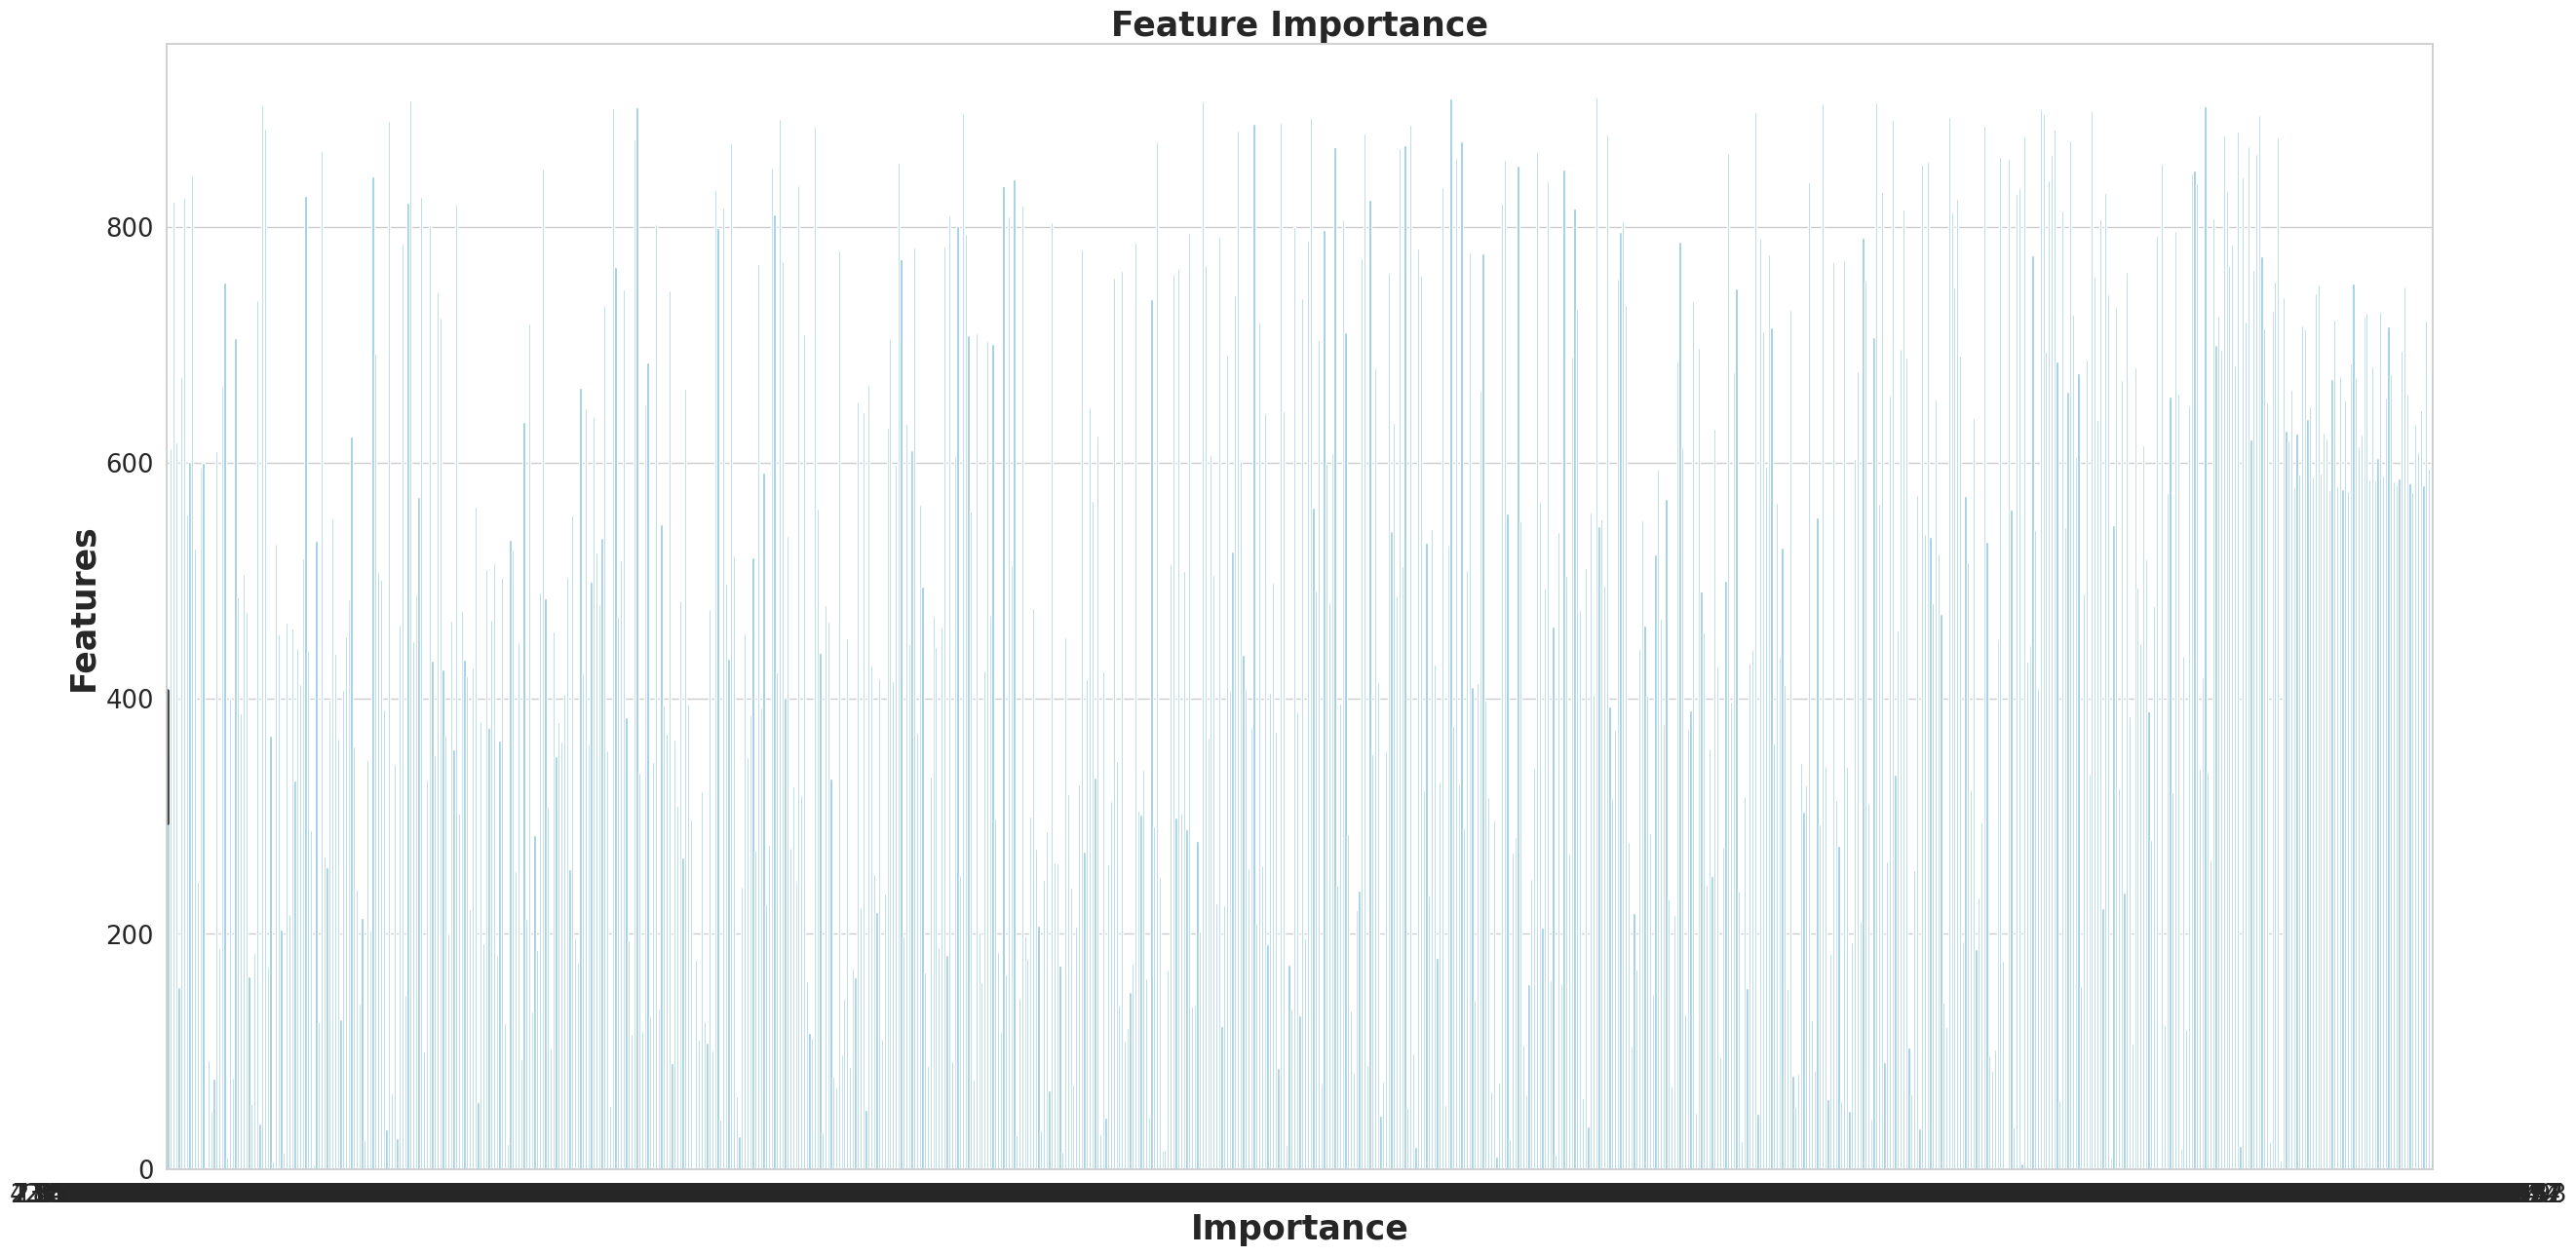

None

,Features,Gini-Importance
0,679,5.354061
1,595,4.192313
2,721,3.516427
3,581,3.402705
4,645,3.037462
...,...,...
906,382,0.000000
907,41,0.000000
908,383,0.000000
909,593,0.000000


In [33]:
feats = {}
for feature, importance in zip(X_train.columns, cb.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='skyblue')
plt.xlabel('Importance', fontsize=25, weight = 'bold')
plt.ylabel('Features', fontsize=25, weight = 'bold')
plt.title('Feature Importance', fontsize=25, weight = 'bold')
display(plt.show())
display(importances)

Saving the current model as a pickle file:

In [20]:
import pickle

In [21]:
with open('catboost_oils.pickle', 'wb') as picklefile:
    pickle.dump(cb,picklefile)


In [22]:
with open('catboost_oils.pickle', 'rb') as training_model:
    binar_classifier_1 = pickle.load(training_model)
y_pred = binar_classifier_1.predict_proba(X_test)
y_pred[:, 1]

array([1.09635265e-03, 9.98428498e-01, 1.24350034e-03, 1.12234306e-03,
       7.82210131e-04, 1.00401217e-03, 1.13660867e-03, 9.96797750e-01,
       1.98825904e-03, 9.98631883e-01, 4.14396442e-03, 9.97627297e-01,
       9.21521687e-04, 2.57290697e-03, 9.98372498e-01, 9.98705189e-01,
       2.72470540e-03, 9.96205617e-01, 9.98837283e-01, 9.98180445e-01,
       9.92701071e-04, 4.66876831e-03, 9.98832682e-01, 9.99234459e-01,
       9.36152220e-04, 9.97875234e-01, 9.99183585e-01, 1.53520529e-03,
       8.08738747e-04, 9.46513110e-04, 9.99229894e-01, 9.97758759e-01,
       9.97627297e-01, 7.80642826e-04, 9.98906229e-01, 1.01119641e-03,
       9.97891651e-01, 2.06045232e-03, 9.55204200e-04, 9.97516951e-01,
       9.97448556e-01, 9.99015492e-01, 9.97475262e-01])

Adding PCA and PLS algorythms:

In [34]:
from sklearn.svm import SVC
from sklearn import  datasets, linear_model, metrics 
from sklearn.model_selection import cross_val_score
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
from sklearn.cross_decomposition import PLSRegression
from sklearn.decomposition import PCA

PCA (principal component analysis)- an algorythm which transforms frame to a less-dimension tensor.

Here we are going to extract 3-dimension data:

In [36]:
pca_model = PCA(n_components=3)
PCA_X_train = pca_model.fit_transform(X_train) 
PCA_X_test = pca_model.transform(X_test)

Some visualising of the result:

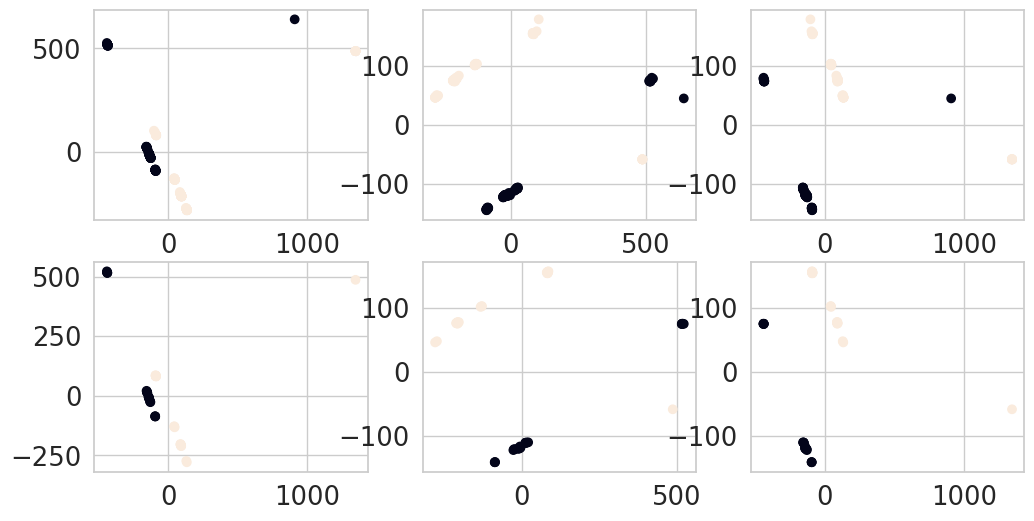

In [42]:
fig, axes = plt.subplots(2,3,figsize=(12,6))

axes[0, 0].scatter(PCA_X_train[:,0], PCA_X_train[:,1], c= y_train) #train
axes[0, 1].scatter(PCA_X_train[:,1], PCA_X_train[:,2], c= y_train)
axes[0, 2].scatter(PCA_X_train[:,0], PCA_X_train[:,2], c= y_train)

axes[1, 0].scatter(PCA_X_test[:,0], PCA_X_test[:,1], c= y_test) #test
axes[1, 1].scatter(PCA_X_test[:,1], PCA_X_test[:,2], c= y_test)
axes[1, 2].scatter(PCA_X_test[:,0], PCA_X_test[:,2], c= y_test)

In [45]:
import plotly.express as px

fig = px.scatter_3d(x=PCA_X_train[:,0], # 3d train visualisation
                    y=PCA_X_train[:,1],
                    z=PCA_X_train[:,2],
                    color=y_train)
fig.show()


fig = px.scatter_3d(x=PCA_X_test[:,0], # 3d test visualisation
                    y=PCA_X_test[:,1],
                    z=PCA_X_test[:,2],
                    color=y_test)
fig.show()

Using Random Forest Classifier MOdel this time:

In [47]:
rfc = RandomForestClassifier( max_depth=None,) #обучение модели и ее тест на данных
rfc.fit(PCA_X_train, y_train)
display(rfc.score(PCA_X_test, y_test))
print(classification_report(y_test, rfc.predict(PCA_X_test))) 

1.0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        22

    accuracy                           1.00        43
   macro avg       1.00      1.00      1.00        43
weighted avg       1.00      1.00      1.00        43



Again we got an excellent quality

PLS(Partial latent squares) - an algorythm which selects variables which have a maximal hidden dependecies with the predictors. Then it's possible to decrease the dimension of the feature frame.

In [48]:
pls_model = PLSRegression(n_components=3)
PLS_X_train = pls_model.fit_transform(X_train, y_train)[0] 
PLS_X_test = pls_model.transform(X_test) 

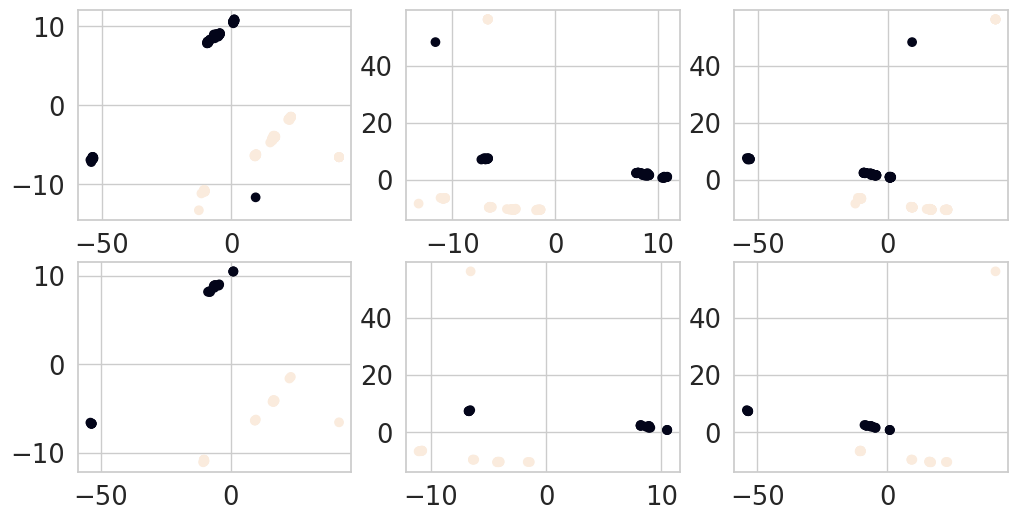

In [50]:
fig, axes = plt.subplots(2,3,figsize=(12,6))

axes[0, 0].scatter(PLS_X_train[:,0], PLS_X_train[:,1], c=y_train)
axes[0, 1].scatter(PLS_X_train[:,1], PLS_X_train[:,2], c=y_train)
axes[0, 2].scatter(PLS_X_train[:,0], PLS_X_train[:,2], c=y_train)

axes[1, 0].scatter(PLS_X_test[:,0], PLS_X_test[:,1], c=y_test)
axes[1, 1].scatter(PLS_X_test[:,1], PLS_X_test[:,2], c=y_test)
axes[1, 2].scatter(PLS_X_test[:,0], PLS_X_test[:,2], c=y_test)

In [51]:
import plotly.express as px

fig = px.scatter_3d(x=PLS_X_train[:,0],
                    y=PLS_X_train[:,1],
                    z=PLS_X_train[:,2],
                    color=y_train)
fig.show()

fig = px.scatter_3d(x=PLS_X_test[:,0],
                    y=PLS_X_test[:,1],
                    z=PLS_X_test[:,2],
                    color=y_test)
fig.show()

In [52]:
rfc = RandomForestClassifier( max_depth=None,) #обучение модели 
rfc.fit(PLS_X_train, y_train)
display(rfc.score(PLS_X_test, y_test))
print(classification_report(y_test, rfc.predict(PLS_X_test))) 

1.0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        22

    accuracy                           1.00        43
   macro avg       1.00      1.00      1.00        43
weighted avg       1.00      1.00      1.00        43



We got a great quality reports with each ML model. The reason of this fact is that the data was completely different and all the used algorythms coped with this problem well. If there was more similar sample spectrums, there would appear a necessity to improve current algorythms, use hyperparameter selection or even neuronetworks.